In [1]:
%%time
import malaya

CPU times: user 10.1 s, sys: 769 ms, total: 10.9 s
Wall time: 11 s


In [2]:
anger_text = 'babi la company ni, aku dah la penat datang dari jauh'
fear_text = 'takut doh tengok cerita hantu tadi'
joy_text = 'bestnya dapat tidur harini, tak payah pergi kerja'
love_text = 'aku sayang sgt dia dah doh'
sadness_text = 'kecewa tengok kerajaan baru ni, janji ape pun tak dapat'
surprise_text = 'sakit jantung aku, terkejut dengan cerita hantu tadi'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is True.**

I suggest you to use deep learning models to understand emotion, these models are better for detecting emotions from social media.

## Load multinomial model

In [3]:
model = malaya.emotion.multinomial()
print(model.predict(anger_text))
print(model.predict(anger_text,get_proba=True))
model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text])

joy
{'anger': 0.11733952772643724, 'fear': 0.15199690452609127, 'joy': 0.2589124946219144, 'love': 0.2024854510784686, 'sadness': 0.2211704631949802, 'surprise': 0.048095158852106114}


['joy', 'fear', 'anger', 'love', 'anger', 'fear']

## Load xgb model

In [4]:
model = malaya.emotion.xgb()
print(model.predict(anger_text))
print(model.predict(anger_text,get_proba=True))
model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text],get_proba=True)

anger
{'anger': 0.37050414, 'fear': 0.17237191, 'joy': 0.21709572, 'love': 0.040401105, 'sadness': 0.16886166, 'surprise': 0.030765474}


[{'anger': 0.37050414,
  'fear': 0.17237191,
  'joy': 0.21709572,
  'love': 0.040401105,
  'sadness': 0.16886166,
  'surprise': 0.030765474},
 {'anger': 0.024576988,
  'fear': 0.9346102,
  'joy': 0.017333886,
  'love': 0.00388243,
  'sadness': 0.015722778,
  'surprise': 0.0038737422},
 {'anger': 0.6121963,
  'fear': 0.07615826,
  'joy': 0.12938385,
  'love': 0.021234306,
  'sadness': 0.13893352,
  'surprise': 0.022093719},
 {'anger': 0.078999326,
  'fear': 0.05360329,
  'joy': 0.05482416,
  'love': 0.7758813,
  'sadness': 0.03182298,
  'surprise': 0.004868941},
 {'anger': 0.7553716,
  'fear': 0.060115993,
  'joy': 0.01417792,
  'love': 0.005369766,
  'sadness': 0.15161343,
  'surprise': 0.01335139},
 {'anger': 0.07156373,
  'fear': 0.241878,
  'joy': 0.0074376594,
  'love': 0.0042003845,
  'sadness': 0.06661975,
  'surprise': 0.6083005}]

## List available deep learning models

In [5]:
malaya.emotion.available_deep_model()

['self-attention', 'bahdanau', 'luong']

## Load deep learning models

Good thing about deep learning models from Malaya, it returns `Attention` result, means, which part of words give the high impact to the results. But to get `Attention`, you need to set `get_proba=True`.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load bahdanau model

In [7]:
model = malaya.emotion.deep_model('bahdanau')

#### Predict single string

In [10]:
model.predict(anger_text)

'anger'

In [11]:
model.predict(fear_text)

'fear'

In [12]:
result = model.predict(sadness_text,get_proba=True)
result

{'anger': 0.38946533,
 'fear': 0.0006788928,
 'joy': 4.502521e-05,
 'love': 0.00035775406,
 'sadness': 0.58941084,
 'surprise': 0.020042183,
 'attention': {'kecewa': 0.9982584,
  'tengok': 0.00024031276,
  'kerajaan': 0.00020539697,
  'baru': 0.00023952134,
  'ni': 0.00016858104,
  ',': 0.0,
  'janji': 0.00020889708,
  'ape': 0.00017103164,
  'pun': 0.00016638139,
  'tak': 0.00017561934,
  'dapat': 0.00016583406}}

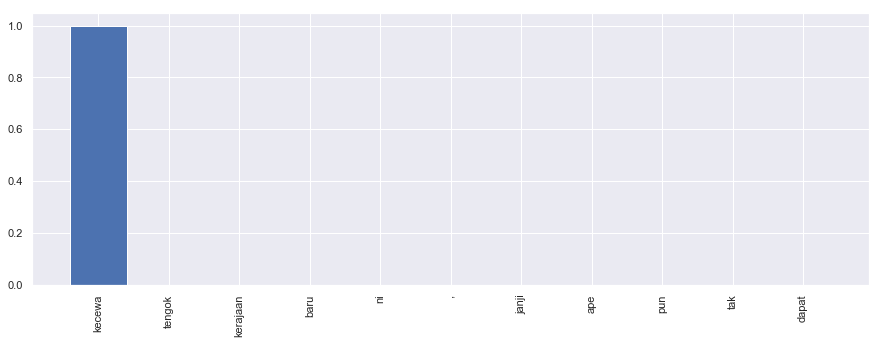

In [13]:
plt.figure(figsize = (15, 5))
keys = result['attention'].keys()
values = result['attention'].values()
aranged = [i for i in range(len(keys))]
plt.bar(aranged, values)
plt.xticks(aranged, keys, rotation = 'vertical')
plt.show()

#### Open emotion visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [14]:
model.predict_words(sadness_text)

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [01/Jun/2019 12:09:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2019 12:09:33] "GET /static/admin-materialize.min.css HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2019 12:09:33] "GET /static/echarts.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2019 12:09:33] "GET /favicon.ico HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 61764)
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 361, in finish_request
    self.Re


stopping Server...


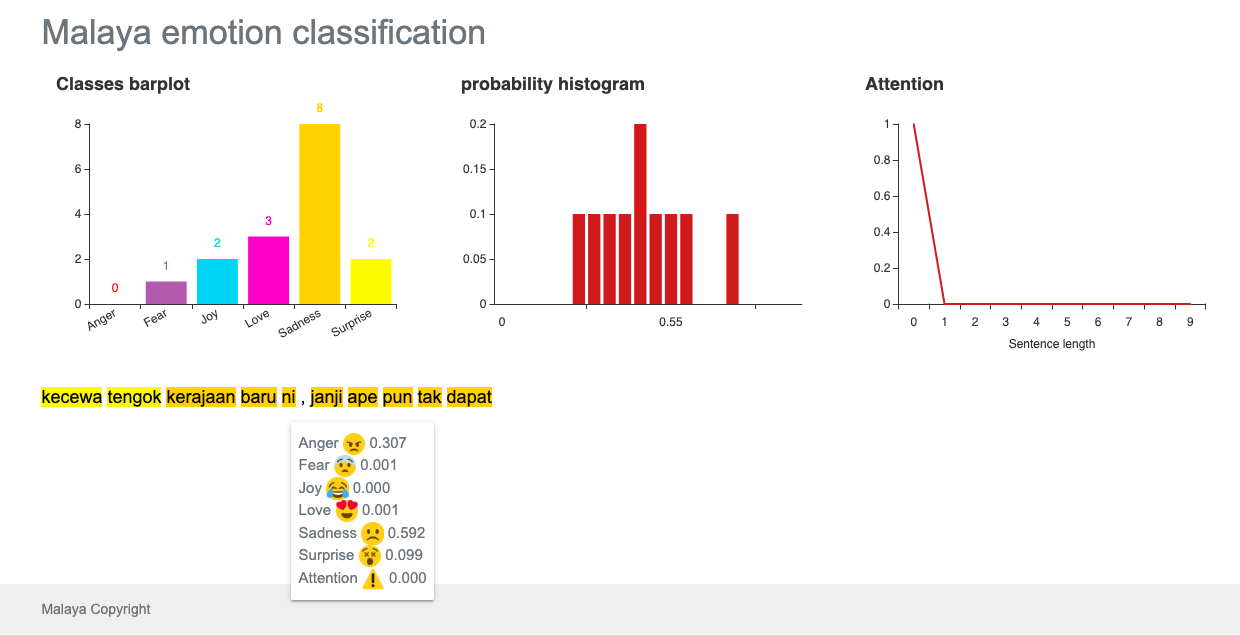

In [15]:
from IPython.core.display import Image, display

display(Image('emotion-bahdanau.png', width=800))

I tried to put the html and javascript inside a notebook cell, pretty hard you know and a lot of weird bugs. Let stick to HTTP serving ya.

`predict_words` only accept a single string. You can't predict multiple texts.

#### Predict batch of strings

In [16]:
model.predict_batch([anger_text, fear_text, joy_text,
                    love_text, sadness_text, surprise_text],get_proba=True)

[{'anger': 0.9470582,
  'fear': 0.00033167106,
  'joy': 9.066894e-06,
  'love': 0.00016375592,
  'sadness': 0.0035682153,
  'surprise': 0.04886904},
 {'anger': 0.013118468,
  'fear': 0.9863961,
  'joy': 5.042084e-05,
  'love': 0.0001933256,
  'sadness': 7.211378e-05,
  'surprise': 0.00016965455},
 {'anger': 0.87134695,
  'fear': 0.008704395,
  'joy': 0.00010600241,
  'love': 0.00063341705,
  'sadness': 0.10522701,
  'surprise': 0.013982114},
 {'anger': 0.007687589,
  'fear': 0.00057056156,
  'joy': 0.0033636452,
  'love': 0.98015594,
  'sadness': 0.003200713,
  'surprise': 0.0050216294},
 {'anger': 0.3216797,
  'fear': 0.00076514384,
  'joy': 3.4114866e-05,
  'love': 0.00025139845,
  'sadness': 0.6674833,
  'surprise': 0.009786241},
 {'anger': 0.028422995,
  'fear': 0.0025764697,
  'joy': 0.00012938023,
  'love': 0.00037871674,
  'sadness': 0.36064965,
  'surprise': 0.60784286}]

**You might want to try `luong` and `self-attention` by yourself.**

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [8]:
multinomial = malaya.emotion.multinomial()
xgb = malaya.emotion.xgb()

In [9]:
malaya.stack.predict_stack([multinomial, xgb, model], anger_text)

{'anger': 0.34863618616181175,
 'fear': 0.022930197531217115,
 'joy': 0.006847226031582371,
 'love': 0.014764885318498622,
 'sadness': 0.030968564413978033,
 'surprise': 0.032697431654758996}

## Load Sparse deep learning models

What happen if a word not included in the dictionary of the models? like `setan`, what if `setan` appeared in text we want to classify? We found this problem when classifying social media texts / posts. Words used not really a vocabulary-based contextual.

Malaya will treat **unknown words** as `<UNK>`, so, to solve this problem, we need to use N-grams character based. Malaya chose tri-grams until fifth-grams.

```python
setan = ['set', 'eta', 'tan']
```

Sklearn provided easy interface to use n-grams, problem is, it is very sparse, a lot of zeros and not memory efficient. Sklearn returned sparse matrix for the result, lucky Tensorflow already provided some sparse function.

In [17]:
malaya.emotion.available_sparse_deep_model()

['fast-text-char']

Right now Malaya only provide 1 sparse model, `fast-text-char`. We will try to evolve it.

In [18]:
sparse_model = malaya.emotion.sparse_deep_model()

INFO:tensorflow:Restoring parameters from /Users/huseinzol/Malaya/emotion/fast-text-char/model.ckpt


In [19]:
sparse_model.predict(love_text)

'love'

In [20]:
sparse_model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text])

['joy', 'fear', 'sadness', 'love', 'anger', 'surprise']

In [21]:
sparse_model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text], get_proba = True)

[{'anger': 0.04526143,
  'fear': 0.09979316,
  'joy': 0.4658971,
  'love': 0.020664953,
  'sadness': 0.30431935,
  'surprise': 0.064064085},
 {'anger': 6.130409e-06,
  'fear': 0.9997508,
  'joy': 2.2800703e-05,
  'love': 3.8201404e-07,
  'sadness': 4.3520595e-06,
  'surprise': 0.00021553691},
 {'anger': 0.20740777,
  'fear': 0.22583336,
  'joy': 0.017892161,
  'love': 0.0037904498,
  'sadness': 0.5115712,
  'surprise': 0.033505023},
 {'anger': 5.2901927e-05,
  'fear': 6.0754595e-05,
  'joy': 1.1822221e-05,
  'love': 0.9991229,
  'sadness': 0.00072059815,
  'surprise': 3.093863e-05},
 {'anger': 0.48188186,
  'fear': 0.33322,
  'joy': 0.018766977,
  'love': 0.00092354603,
  'sadness': 0.078747146,
  'surprise': 0.086460434},
 {'anger': 0.007138084,
  'fear': 0.2971508,
  'joy': 0.0024597635,
  'love': 0.00037835565,
  'sadness': 0.031262815,
  'surprise': 0.6616101}]